# **Towards Building An Effective Multi-Label Image Classification Model** <br>

## **STINTSY Technical Report**

### **S14 - Group 3**:
- Jadie, Joshue Salvador A.
- Lopez, Angel L.
- Ponce, Andre Dominic H.

<br>

##### **Last Updated**: 06/28/22

#### **TODO: Delete this cell after technical report notebook is already done.**

Notes:
* Do not use **softmax** as output activation function for multilabel classification. Softmax is only applicable for mutually exclusive classes, e.g. either cat or dog but not both. Softmax outputs all add to 1, so cannot be applied to multilabel wherein a single instance can be classified with two or more labels.
* Convolutional Neural Networks (CNNs) models will be used towards doing the task. The planned models to use and evaluate with are: **AlexNet**, **VGGNet**, **ResNet**, and **DenseNet**.

## **Problem**

##### **TODO: Add in-text citations** <br>
### **Multi-Label Image Classification**
Multi-label image classification is a type of image classification that predicts the probability of each class in a single image of the dataset. In contrast to binary or multi-class image classification models, wherein they classify images as belonging to **one** of two or more classes, a multi-label image classification model classifies images as belonging to **two or more classes**.

In this notebook, the goal is to build a good model that performs the task on a chosen image dataset, producing a **high-enough** prediction accuracy. The training of the model is done using the **supervised learning** approach.

The image dataset to perform the task on is the **Tom and Jerry Image Classification Dataset** which is a recently made dataset in **Kaggle**.

## **Problem Dataset**

### **Tom and Jerry Image Classification Dataset**

<img src="References/tomandjerry.jpg" width="300"/>

One of the famous cartoon shows, *Tom and Jerry* is an American animated media franchise and series of comedy short films produced in 1940 by *William Hanna* and *Joseph Barbera*. The series centers on the rivalry between the titular characters of a cat named *Tom* and a mouse named *Jerry*. 

The Kaggle dataset was produced by **Bala Baskar**. It contains `5478` images extracted from a set of Tom and Jerry episode videos that are available online. The images were acquired by converting the videos into images with 1 frame per second (FPS). Based on the dataset, an image can be classified as either `Tom`, `Jerry`, both `Tom` and `Jerry`, or none at all. The classification also means if Tom, Jerry, or both of them are present in the image.

Along with this, a comma-separated values (csv) file named `ground_truth` is also provided containing the **ground truth** labels for each image which allows for **supervised** learning. According to Baskar, the labeling for each images was done manually therefore the **accuracy** of the ground truth labels in the csv file is `100%`.
<br><br>

#### **Dataset Source**: [Kaggle](https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification)

To construct our dataset, the initial features that we will be dealing with are the **images** themselves. As observed in the Kaggle dataset, the images are in `JPEG` format with a resolution of `1280x720`. 

With that said, each image will be resized as `256x256` images and are then converted to **3D numpy ndarrays** with the dimensions being `256x256x3`. The third dimension's value, which is `3`, represents the `RGB` channels as these are RGB images. The values in each 3D array, which are pixel values, are then normalized to `0-1` to allow for faster convergence later on in model training.

Each `instance` from the dataset is a single image (frame) extracted from a Tom and Jerry episode video. These instances can either have Tom, Jerry, both, or none present.

## **Requirements**

Below are the dataset files and Python modules to be used throughout this notebook.

**Tom and Jerry Image Classification Dataset**
- `tom` - folder which contains images wherein **Tom** is only present.
- `jerry` - folder which contains images wherein **Jerry** is only present.
- `tom_jerry_1` - folder which contains image wherein both Tom and Jerry are **present**.
- `tom_jerry_0` - folder which contains images wherein both Tom and Jerry are **not present**.
- `ground_truth` - csv file which contains the **ground truth class labels** for each image.

**Python Modules**
- `pandas`
- `numpy`
- `os`
- `cv2` (OpenCV)
- `matplotlib`
- `sklearn`
- `tensorflow (keras, etc.)`
- *to be added... (**TODO**: add here the new modules that we will be using)*

## **Creating the Image Dataset**

Lets create the image dataset to be used for model training. First, all of the needed modules for dataset creation and exploration are imported below.

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg

# to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline

# plot configurations
plt.rcParams['figure.figsize'] = (10, 10)

# random number generator seed
np.random.seed(1)

The `create_img_dataset` function below produces the image dataset containing all of the stored images from each sub-folder of the specified image directory and their ground truth class labels.
* It will read the **ground truth file** containing the `ground truth class labels` for each image.
* It will read the image files from all **folders** of the specified image directory and convert them to the right color format (**RGB**).
* It will **resize** each image based on the set image dimensions, `256x256` as the default image dimension values.
* It will **convert** the image to a `numpy` array with `float32` as the datatype.
* It will **normalize** the image array to have values scaled down between **0 and 1** from 0 to 255 for a similar data distribution. This is done in order to have **faster convergence** later on in model training.

In [2]:
def create_img_dataset(img_dir, ground_truth, size=[256, 256]):
    # np ndarray containing the tom and jerry images represented 3D numpy ndarrays
    X = []
    # np ndarray containing the ground truth (y) labels for each image
    y = []
    
    # get ground truth labels and store them into a dataframe
    labels = pd.read_csv(ground_truth)
    
    # get and pre-process all images from each folder in the specified image 
    for sub_dir in os.listdir(img_dir):
        for img_file in os.listdir(os.path.join(img_dir, sub_dir)):
            # get image path
            img_path = os.path.join(img_dir, sub_dir, img_file)
            # read image, it will be on the defaukt BGR format first
            img = cv2.imread(img_path)
            # convert to RGB format
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # resize image according to set image dimensions
            img = cv2.resize(img, (size[0], size[1]), interpolation=cv2.INTER_AREA)
            # convert image to numpy array with float32 as data type
            img = np.array(img).astype('float32')
            # normalize the image array's values to 0-1
            img /= 255
            # store image in array
            X.append(img)
            # store image's ground truth class label, there must be a 'filename' column which
            # corresponds to the name of the current image file being stored
            y.append(labels[labels['filename'] == img_file].values[:, 1:].squeeze())
            
    # return the created image dataset as numpy ndarrays
    return np.array(X), np.array(y).astype(int)

Below are the image dimension values and image directory to be used for creating the image dataset.

In [3]:
# image dimension values (width x height)
img_dims = [256, 256]

# image directory of Tom and Jerry images
img_dir = 'tom_and_jerry\\'

# file containing the ground truth labels for each image
ground_truth = 'ground_truth.csv'

With the function and configurations set, create the image dataset.

In [4]:
X, y = create_img_dataset(img_dir, ground_truth, img_dims)

## **Exploratory Data Analysis**

##### **_Identifying the number of images for each class_**

As there are two classes from the dataset which are `Tom` and `Jerry`, the number of images assigned to each class shall be identified. Along with these, the number of images wherein `both` or `none` of them are present shall also be determined. To do this, lets use `y`, which is the numpy array containing the **ground truth class labels** for each image, to determine the number of images for each class. 

Since the task being performed is **multi-label** image classification, each image will have two `y` values indicating if `Tom` and `Jerry` are present in the image or not. The first `y` value indicates to the presence of `Tom` in the image while the second `y` value indicates to the presence of `Jerry` in the image. The values for `y` are only `0` or `1` wherein `0` tells that Tom or Jerry is not present in the image while `1` tells that Tom or Jerry is present in the image.

To confirm the statement above, lets view the `ground_truth` csv file where the `y` numpy array was created from.

In [5]:
# read ground_truth csv file and store it as a dataframe
df_gt = pd.read_csv(ground_truth)

# display the first 5 rows only
df_gt.head()

,filename,tom,jerry
0,frame0.jpg,0,0
1,frame1.jpg,0,0
2,frame2.jpg,0,0
3,frame3.jpg,0,0
4,frame4.jpg,0,0


From the `ground_truth` csv file, we can see that the first column `tom` indicates **Tom**'s presence in the image while the second column `jerry` indicates **Jerry**'s presence in the image. For example, the first image which has a filename of `frame0.jpg` has both Tom and Jerry **not present** in the image since the values for both columns are `0`.

Lets now get all unique rows (1D numpy arrays) and get the number of images for each.

In [6]:
# get all unique rows (1D numpy arrays) and the number of images for each
unique, num_of_imgs = np.unique(y, axis=0, return_counts=True)

Lets view the unique rows from the `y` numpy array.

In [7]:
unique

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

We can see that there are `4` unique 1D numpy arrays from `y`. The array with values `0, 0` indicates that **both Tom and Jerry** are **not present** in the image, `0, 1` indicates that **only Jerry** is **present** in the image, `1, 0` indicates that **only Tom** is **present** in the image, and `1, 1` indicates that **both Tom and Jerry** are **present** in the image.

Next, lets view the number of images for each unique row.

In [8]:
num_of_imgs

array([1528, 1240, 1930,  780], dtype=int64)

Lets visualize the results with a bar chart.

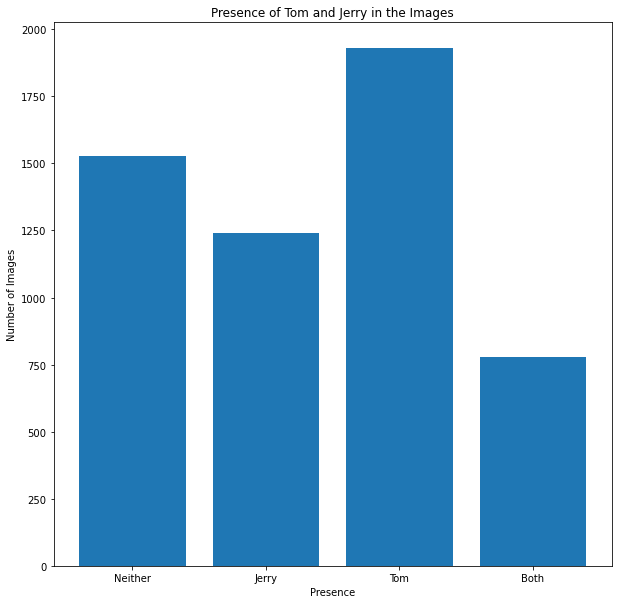

In [9]:
# create descriptive labels for each unique row from the `y` numpy array
labels = ['Neither', 'Jerry', 'Tom', 'Both']

# setup bar chart and its texts
plt.bar(labels, num_of_imgs)
plt.title("Presence of Tom and Jerry in the Images")
plt.xlabel("Presence")
plt.ylabel("Number of Images")

# display bar chart
plt.show()

As observed from the results, there are `1930` images wherein **only Tom** is **present**, `1240` images wherein **only Jerry** is **present**, `780` images wherein **both** are **present**, and `1528` images wherein **neither** of them are **present**.

##### **TODO: add more insights in this part regarding the number of images**

##### **_Viewing a sampling of images_**

To familiarize ourselves with the data, lets randomly view `20` images from the dataset.

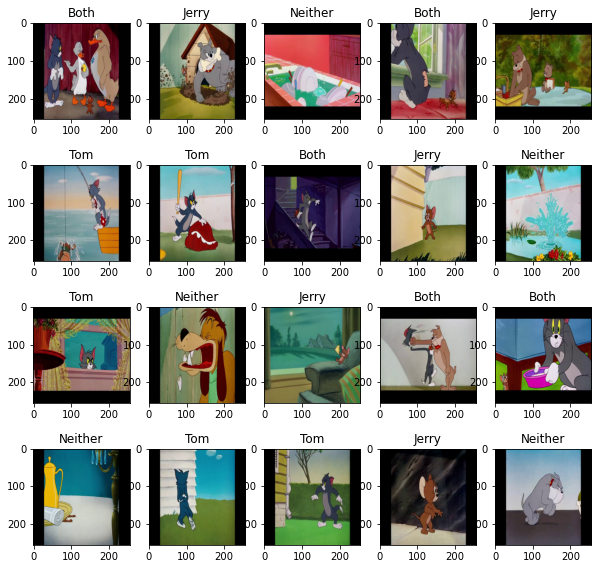

In [10]:
# display 20 random images from the dataset along with their ground truth class labels
for i in range(20):
    idx = np.random.randint(len(X))
    ax=plt.subplot(4, 5, i+1)
    
    # get descriptive class label
    if y[idx][0] == 0 and y[idx][1] == 0:
        classes = 'Neither'
    elif y[idx][0] == 0 and y[idx][1] == 1:
        classes = 'Jerry'
    elif y[idx][0] == 1 and y[idx][1] == 0:
        classes = 'Tom'
    else:
        classes = 'Both'
    
    # set descriptive label and display image
    ax.title.set_text(classes)
    plt.imshow(X[idx])

##### **TODO: We can add the Tom and Jerry images here wherein only their tail or hands are shown, also parts wherein they are covered / blocked by objects, to support the second paragraph.** <br>

As observed above, we can see that the Tom and Jerry images have varying `brightnesses` and `backgrounds`. There are also different orientations per image, some images are shown in `portrait` while some images are shown in `landscape`. 

There are also images wherein only certain body parts of Tom or Jerry are shown such as their `tail` or `hands`, yet the ground truth class label for those images indicate that Tom or Jerry is **present** in that image. 

These observations will be useful later on in this notebook, as we determine and analyze the performance of the model that we will build to perform the task.

## **Model Training and Hyperparameter Tuning**

##### **TODO: Add in-text citations** <br>

The algorithm that we are going to use towards building the model is `Convolutional Neural Network (CNN)`. Based on research, this is the **preferred** model algorithm for image classification since it effectively **lowers** the number of parameters handled in training given an image dataset. With lower number of parameters, this greatly improves the time it takes to learn as well as reduce the amount of data required to train the model. 

Unlike a network with fully connected layers wherein the number of parameters **grows rapidly** which makes the model training **computationally expensive**, a CNN solves this by lowering the number of parameters needed for training. It emphasizes the idea that a **local** understanding of the image is good enough since adjacent pixels in a specific location of an image are **similar** to one another. CNNs share the same parameters across the different locations of the image instead of treating each pixels as a separate feature, allowing for **easier** training.

With these said, CNN is the most effective and fit model when it comes to **image classification tasks and processing**. Given that images have **high dimensionality yet strong spatial correlation**, CNNs are very effective in reducing the number of parameters without losing on the model's quality. It **convolves** the input images, reducing their dimensions while retaining their **salient** features. This allows for **faster** processing during training.

##### **TODO: Add in-text citations** <br>

CNNs are made up of **two** main components: the first component is for **feature extraction** and the second component is for **classification**. 

The first component is composed of the **convolutional**, **pooling**, and **flattening** layers. The **convolutional** layer is in charge of applying filters to the input image to extract its features. The outputs from the convolutional layer will then be passed on to the **pooling** layer which will **downsample** the outputs, or in other words, reduce the dimensions for faster processing. The pooling layer is used for **spatial dimensionality reduction**, it is done so that only the **most important** features are highlighted during training. Lastly, the **flattening** layer flattens the **pooled** output into a one-dimensional output which will then be passed on to the second component of CNN.

The second component consists of the final layer which is **fully connected**. As the final layer, it uses the output from the flattening layer and generates the **final prediction** of the input image. This prediction is a **probability value** which indicates the **class** that the image **belongs** to.

##### **TODO: Add to references section each of the citation for the CNN architectures.** <br>
In order to achieve a good model with **high-enough** task accuracy on the Tom and Jerry image dataset, we will be experimenting on `4` different well-known CNN architectures. The CNN architectures that we will use to perform the multi-label image classification task on the dataset are as follows:
* `AlexNet` (Krizhevsky et al., 2012)
* `VGG-19` (Simonyan & Zisserman, 2014)
* `ResNet-50` (He et al., 2016)
* `DenseNet-121` (Huang et al., 2017)

With this, a total of `4` **multi-label image classification** CNNs will be **trained, validated, and tested** with the Tom and Jerry dataset.

##### **_Train/test/validation split_**

Before constructing the CNNs, lets first split our Tom and Jerry image dataset into **train, test, and validation** sets. `80%` of the data will be placed on the **train** set, `10%` on the **test** set, and `10%` on the **validation** set.

Import the `train_test_split()` from `sklearn`.

In [11]:
from sklearn.model_selection import train_test_split

Divide the dataset first into train and test sets, where `20%` of the data will be placed into the test set. `random_state` is set to `1`.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Now, divide the test set's data into half (`50%`), producing the test and validation sets. Both will have `10%` of the data. `random_state` is also set to `1`.

In [13]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

Display the shape of the train, validation, and test sets.

In [14]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_val', X_val.shape)
print('y_val', y_val.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4382, 256, 256, 3)
y_train (4382, 2)
X_val (548, 256, 256, 3)
y_val (548, 2)
X_test (548, 256, 256, 3)
y_test (548, 2)


With the train, test, and validation sets created, lets now proceed to creating the CNNs.

##### **_AlexNet_**

**AlexNet** (Krizshevsky et al., 2012) is a CNN architecture best known for winning the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012 competition by an immense error margin and can be credited with stimulating the rise in popularity of CNNs.

<img src="References/AlexNet.png" width="700"/>

The CNN architecture includes `5` convolutional layers and `3` max-pooling layers. It is also the first to introduce and use the **Rectified Linear Unit** (`ReLU`) as the **nonlinear activation function**. Compared to the `Tanh` activation function, `ReLU` is said to improve training speed due to **non-saturation** of gradients. The **max-pooling** layers are used to reduce error rate. Lastly, the architecture also made use of **drop-out** layers after the fully-connected layers to avoid **over-fitting**.

To create the **AlexNet** model in performing the task on the Tom and Jerry dataset, we will use `keras` which is a **high level API** of TensorFlow for creating deep learning models.

Lets import all of the needed functions from `keras` to construct the AlexNet model. We will be using the `Sequential()` function of `keras` to resemble the architecture. 

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Flatten, Dropout

With the `keras` functions imported, lets construct the AlexNet model for multi-label image classification.

In [24]:
# initialize with Sequential to create and connect model layers
alexnet = Sequential()

# first convolutional layer, convolve the image with a 11x11 kernel to get the features
alexnet.add(Conv2D(input_shape=(256, 256, 3), filters=96, kernel_size=(11, 11), strides=(4, 4), padding="same", activation="relu"))
# first batch normalization layer, normalize the input values
alexnet.add(BatchNormalization())
# first max-pooling layer, get only the important features
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

# second convolutional layer, convolve the image with a 5x5 kernel
alexnet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1, 1), padding="same", activation="relu"))
# second batch normalization layer
alexnet.add(BatchNormalization())
# second max-pooling layer
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

# third convolutional layer, convolve the image with a 3x3 kernel
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
# third batch normalization layer
alexnet.add(BatchNormalization())
# fourth convolutional layer, convolve the image with a 1x1 kernel
alexnet.add(Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), padding="same", activation="relu"))
# fourth batch normalization layer
alexnet.add(BatchNormalization())

# last convolutional layer, convolve the image with a 1x1 kernel
alexnet.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding="same", activation="relu"))
# last batch normalization layer
alexnet.add(BatchNormalization())
# last max-pooling layer
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

# flattening layer, flatten the output into a one-dimensional array
alexnet.add(Flatten())

# fully connected layers, dropout to avoid issue of overfitting
alexnet.add(Dense(4096, activation="relu"))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(4096, activation="relu"))
alexnet.add(Dropout(0.5))

# produce final prediction (probability)
# sigmoid as activation function to predict the probability of Tom/Jerry being present in an image
# produces two output probabilities: one for Tom's presence and the other one for Jerry's presence in the image
alexnet.add(Dense(2, activation="sigmoid"))

##### **TODO: Add in-text citation** <br>

As observed in the code above, the nonlinear activation function used for the output layer is **sigmoid**. Though it might not be clearly visible since there are only `2` classes in the dataset which are `Tom` and `Jerry`, the **softmax** activation function cannot be used for **multi-label** image classification. 

This is because softmax can only be used for **mutually exclusive** class outputs (e.g. either cat or dog but not both). With more than 2 classes, softmax compares the probabilities of each class and chooses the class with the **highest probability** as label for the image. It is applicable to **multi-class** image classification but not for **multi-label** image classification wherein an input image can have more than one label.

With that said, we use **sigmoid** to predict the probability of each class **separately** in an input image.

Lets display the summary of the AlexNet model.

In [59]:
alexnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 31, 31, 256)      1024      
 hNormalization)                                                 
                                                      

Since we are using **sigmoid** as the output layer's activation function, and we are also trying to determine if Tom and Jerry are present in the image or not **separately**, we can view this as a **binary classification problem** but with `2` output probabilities (one for **Tom's presence** and one for **Jerry's presence**).

To optimize the AlexNet model for the task, we will be using **Binary Cross-Entropy** as the **loss function**. Along with this, we will use **Adaptive Moment Estimation (Adam)** as the **optimizer** for the model.

Lets now **define** binary cross-entropy and adam as the loss function and optimizer to be used for model optimization. We will use the `compile()` function of the created model to do this. For the metrics, we only need the `accuracy` to see how the model has performed.

In [143]:
# define the loss function and optimizer to be used for optimizing the model, use accuracy only for metrics
alexnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

According to the Keras API documentation, **back propagation** is **automatically** done by Keras itself just by calling the `fit()` method of the created model. With that said, we just need to define the `batch_size` and number of `epochs` needed for optimizing the model. 

Before we train the AlexNet model, lets first implement the **early-stopping** method which will help mitigate overfitting during training with the `fit()` by monitoring the validation loss or accuracy. 

To do this, we will create an `EarlyStopping` callback object using Keras which will monitor the validation loss (`val_loss`) during training. Lets also set `patience` to `5` which is the number of epochs for the training to be continued after the halt. This is done just in case if the model's performance still improves through the succeeding epochs after the epoch that caused the training halt. We will also set `restore_best_weights` to `True` to retrieve the best weights of the model after the halt.

In [62]:
# import callbacks module of keras for the earlystopping callback object
from keras import callbacks

# create EarlyStopping callback object to monitor validation loss per epoch
es = callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=5, restore_best_weights=True)

Lets now train the AlexNet model with the train set. We will also **initially** set the `batch_size` to `32` and the number of `epochs` to `50`. The validation set (`X_val` and `y_val`) will be used as `validation_data` for optimization. We will also set the `EarlyStopping` object as the callback after each epoch to monitor the **validation loss**. If the validation loss **increments**, the callback object will **halt** the training to avoid model overfitting.

In [63]:
alexnet.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/50
137/137 [==============================] - 211s 2s/step - loss: 0.5983 - accuracy: 0.6837 - val_loss: 0.5781 - val_accuracy: 0.4234
Epoch 2/50
137/137 [==============================] - 220s 2s/step - loss: 0.4915 - accuracy: 0.7017 - val_loss: 0.6082 - val_accuracy: 0.3960
Epoch 3/50
137/137 [==============================] - 214s 2s/step - loss: 0.4453 - accuracy: 0.7175 - val_loss: 0.5027 - val_accuracy: 0.5821
Epoch 4/50
137/137 [==============================] - 214s 2s/step - loss: 0.4051 - accuracy: 0.7287 - val_loss: 0.4466 - val_accuracy: 0.6058
Epoch 5/50
137/137 [==============================] - 219s 2s/step - loss: 0.4043 - accuracy: 0.7264 - val_loss: 0.3387 - val_accuracy: 0.6825
Epoch 6/50
137/137 [==============================] - 215s 2s/step - loss: 0.3857 - accuracy: 0.7225 - val_loss: 0.3734 - val_accuracy: 0.6314
Epoch 7/50
137/137 [==============================] - 225s 2s/step - loss: 0.3727 - accuracy: 0.7166 - val_loss: 0.3023 - val_accuracy: 0.7208

As observed, the training stopped at the `26th` epoch as the model will start overfitting at the `27th` epoch. This indicates that the optimal number of epochs to train the model is `26` given a batch size value of `32`.

With the AlexNet model trained and optimized, lets see how it will perform with the test set.

In [137]:
# predict on test set
predictions = alexnet.predict(X_test)

# display predictions
predictions

18/18 [==============================] - 5s 286ms/step


array([[0.998946  , 0.03401757],
       [0.9868792 , 0.10287965],
       [0.47703925, 0.48597008],
       ...,
       [0.31098747, 0.34133416],
       [0.8043495 , 0.2695518 ],
       [0.99293226, 0.5796675 ]], dtype=float32)

Lets check how many correct multi-label predictions did the AlexNet model made on the test set. 

First, lets create the `compute_accuracy()` function below which gets the **number** of correct multi-label predictions from the model on a specified dataset as well as its **accuracy**. The `predictions` is a numpy array containing the model's predictions on the dataset while the `actual` is a numpy array containing the actual `ground truth` labels per each image in the dataset.

In [139]:
def compute_accuracy(predictions, actual):
    correct = 0
    pred = np.round(predictions) # round off values first
    for i in range(len(pred)):
        if pred[i][0] == y_test[i][0] and pred[i][1] == y_test[i][1]:
            correct += 1
    return correct, correct / len(actual)

Lets now get the number of correct predictions as well as the accuracy of the model on the test set.

In [142]:
correct, accuracy = compute_accuracy(predictions, y_test)

print("Number of correct predictions: {} / {}".format(correct, len(y_test)))
print("Test accuracy: {}".format(accuracy))

Number of correct predictions: 470 / 548
Test accuracy: 0.8576642335766423


Out of `548` test set instances, the AlexNet model was able to predict `470` instances correctly. The test accuracy achieved by the model is `85.7664`%.

##### **_VGG-19_**

##### **_ResNet-50_**

##### **_DenseNet-121_**

## **Model Selection**

## **Data Augmentation**

##### **TODO: To be done after getting the best CNN model. In this section, we will check if augmenting the data (creating new instances by rotating, flipping, and transforming images) can improve the accuracy of the best model.**

## **Insights and Conclusion**

## **References**

##### **TODO: Do APA format citation for the references, as well as include in-text citations in the previous markdown cells. Remove this cell afterwards once done.**

* [Tom and Jerry Image Classification Dataset (Kaggle)](https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification)
* [EDA for Image Classification](https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a)
* [Basic EDA with Images](https://www.kaggle.com/code/jpmiller/basic-eda-with-images/notebook)
* [Multi-label image classification vs. object detection](https://stackoverflow.com/questions/66337588/multi-label-image-classification-vs-object-detection)
* [Multilabel Image Classification using Deep Learning](https://www.mathworks.com/help/deeplearning/ug/multilabel-image-classification-using-deep-learning.html)
* [Multi-Label Image Classification Classification with Neural Network | Keras](https://towardsdatascience.com/multi-label-image-classification-with-neural-network-keras-ddc1ab1afede)
* [Why are Convolutional Neural Networks good for image classification?](https://medium.datadriveninvestor.com/why-are-convolutional-neural-networks-good-for-image-classification-146ec6e865e8)
* [The 4 Convolutional Neural Network Models That Can Classify Your Fashion Images](https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d)
* [Multi-label vs Multi-class Classification: Sigmoid vs Softmax](https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/)
* [Understanding the Amazon Rainforest with Multi-Label Classification + VGG-19, Inceptionv3, AlexNet & Transfer Learning](https://towardsdatascience.com/understanding-the-amazon-rainforest-with-multi-label-classification-vgg-19-inceptionv3-5084544fb655)
* [Keras API reference](https://keras.io/api/)
* [Choose optimal number of epochs to train a neural network in Keras](https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/)